In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [3]:
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [4]:
r.status_code

200

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all('span', attrs={'class':'short-desc'})

In [6]:
records = []
for result in results:
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.find('a').text[1:-1]
    url = result.find('a')['href']
    records.append((date, lie, explanation, url))

In [7]:
df = pd.DataFrame(records, columns=['date', 'lie', 'explanation', 'url'])
df['date'] = pd.to_datetime(df['date'])
# df.to_csv('trump_lies.csv', index=False, encoding='utf-8')

In [11]:
df.dtypes

date           datetime64[ns]
lie                    object
explanation            object
url                    object
dtype: object

In [12]:
df.head()

,date,lie,explanation,url
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [66]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [67]:
x = df.groupby([df['date'].dt.year, df['date'].dt.month]) \
    [['lie']].count().reset_index(level=1)['date'].map(month_map)
y = df.groupby([df['date'].dt.year, df['date'].dt.month]) \
    [['lie']].count().reset_index(level=1)['lie']

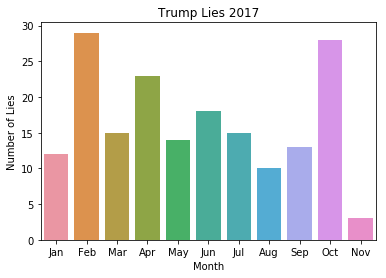

In [68]:
ax = sns.barplot(x, y)
ax.set(xlabel='Month', ylabel='Number of Lies')
plt.title('Trump Lies 2017')
plt.show()